> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

In [53]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',None)
wc = pd.read_csv('../wc_formatado.csv')  # Adjust the path to match the actual location of the file
wc.drop('Unnamed: 0', axis=1, inplace=True)




#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [19]:


# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  

# Seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")  

# Plotly
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
pio.renderers.default = "browser"


import numpy as np

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [4]:
wc_comparecimento_formatado = wc[wc['comparecimento'] != 0]
wc_comparecimento_formatado.reset_index(drop=True, inplace=True)


Text(0, 0.5, 'Numero de jogos')

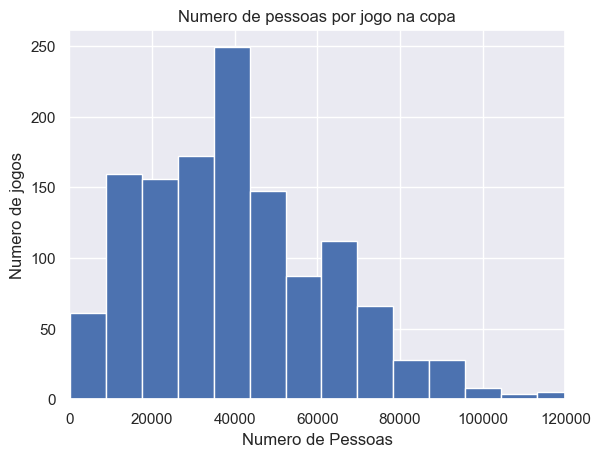

In [5]:
#### Solução com matplotlib
plt.hist(wc_comparecimento_formatado['comparecimento'],bins=20)
plt.title('Numero de pessoas por jogo na copa')
plt.xlim(0, 120000)

plt.xlabel('Numero de Pessoas')
plt.ylabel('Numero de jogos')

Text(0, 0.5, 'Numero de jogos')

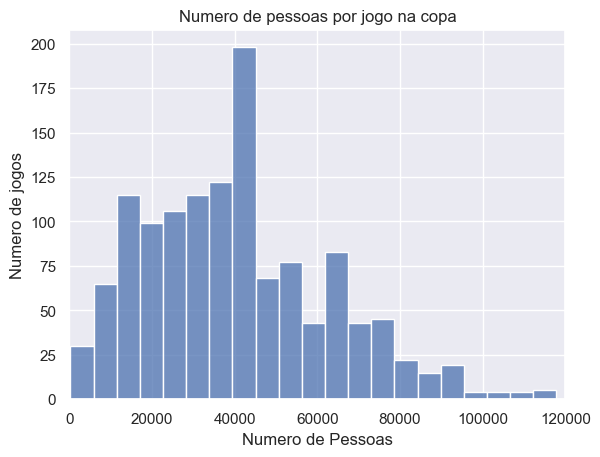

In [6]:
#### solução com seaborn
sns.histplot(data=wc_comparecimento_formatado, x='comparecimento')

plt.title('Numero de pessoas por jogo na copa')
plt.xlim(0, 120000)
plt.xlabel('Numero de Pessoas')
plt.ylabel('Numero de jogos')


In [7]:
#### solução com plotly
fig = px.histogram(wc_comparecimento_formatado, x='comparecimento')
fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

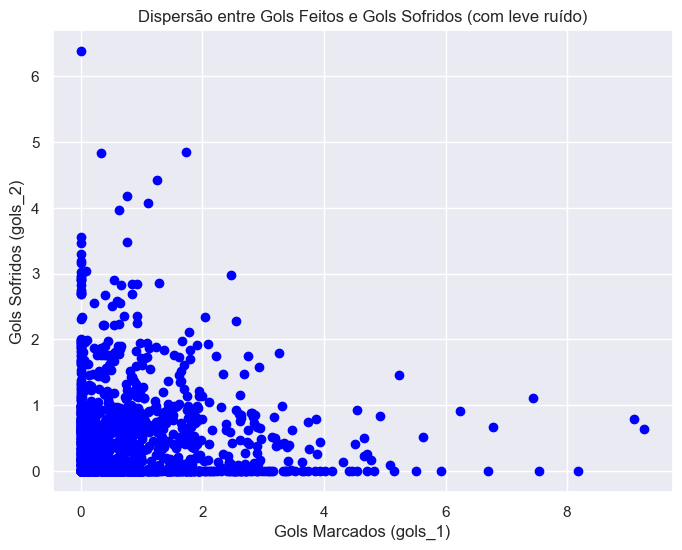

In [8]:
#### solução com matplotlib


gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))

# Criando o scatter plot com matplotlib
plt.figure(figsize=(8,6))
plt.scatter(gols['gols_1'], gols['gols_2'], color='blue')

# Adicionando título e rótulos
plt.title('Dispersão entre Gols Feitos e Gols Sofridos (com leve ruído)')
plt.xlabel('Gols Marcados (gols_1)')
plt.ylabel('Gols Sofridos (gols_2)')

plt.grid(True)
plt.show()

<Axes: xlabel='gols_1', ylabel='gols_2'>

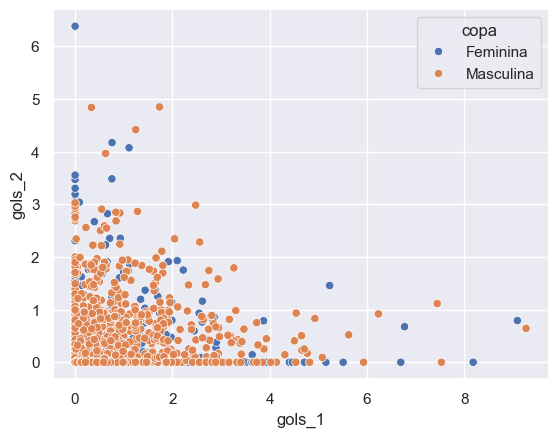

In [9]:
#### solução com seaborn
sns.scatterplot(x=gols['gols_1'] ,y=gols['gols_2'],hue=wc['copa'] )

In [10]:
#soluçao com plotply
px.scatter(x=gols['gols_1'],y=gols['gols_2'],color=wc['copa'])

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [11]:
times_1 = wc[['time_1', 'ano', 'copa','gols_1','gols_2','cartao_amarelo_1','cartao_amarelo_2']].rename(columns={'time_1': 'pais'})
times_2 = wc[['time_2', 'ano', 'copa','gols_1','gols_2','cartao_amarelo_1','cartao_amarelo_2']].rename(columns={'time_2': 'pais'})

# 2. Concatenar os dois DataFrames
todos_times = pd.concat([times_1, times_2])

# 3. Remover duplicatas: um país pode aparecer mais de uma vez por ano/copa
todos_times = todos_times.drop_duplicates()

# 4. Contar quantos anos únicos cada país participou, por tipo de copa
participacao = todos_times.groupby(['pais','copa'])['ano'].nunique().reset_index(name='num_copas')
participacao = participacao.sort_values('num_copas',ascending=False)



feminina = participacao[participacao['copa'] == 'Feminina'].sort_values('num_copas', ascending=False)
masculina = participacao[participacao['copa'] == 'Masculina'].sort_values('num_copas', ascending=False)


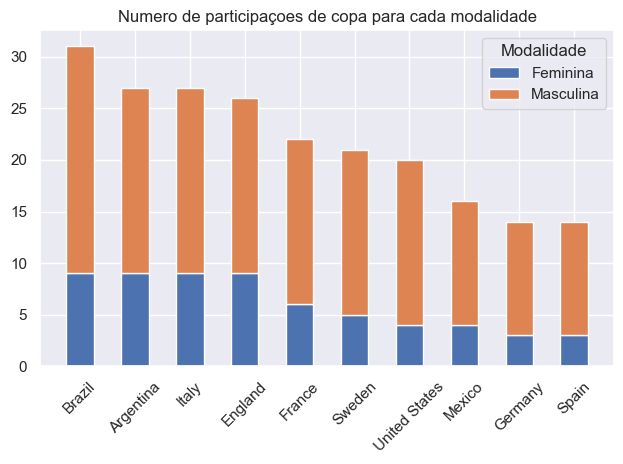

In [12]:
participacao_paises = todos_times.groupby(['pais'])['ano'].nunique().reset_index(name='num_copas')
participacao_paises = participacao_paises.sort_values('num_copas',ascending=False)
lista_paises = participacao_paises["pais"].head(10).tolist()

participacao_por_genero = {

}

for index,row in feminina.iterrows():
    if row['pais'] in lista_paises:
        if row['copa'] not in participacao_por_genero:
            participacao_por_genero[row['copa']] = [row['num_copas']]
        else:    
            participacao_por_genero[row['copa']].append(row['num_copas'])
            
for index,row in masculina.iterrows():
    if row['pais'] in lista_paises:
        if row['copa'] not in participacao_por_genero:
            participacao_por_genero[row['copa']] = [row['num_copas']]
        else:    
            participacao_por_genero[row['copa']].append(row['num_copas'])

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(lista_paises))

for boolean,row in participacao_por_genero.items():
    p = ax.bar(lista_paises,row,width,label=boolean, bottom=bottom)
    bottom += row

ax.set_title('Numero de participaçoes de copa para cada modalidade')
ax.legend(title='Modalidade')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

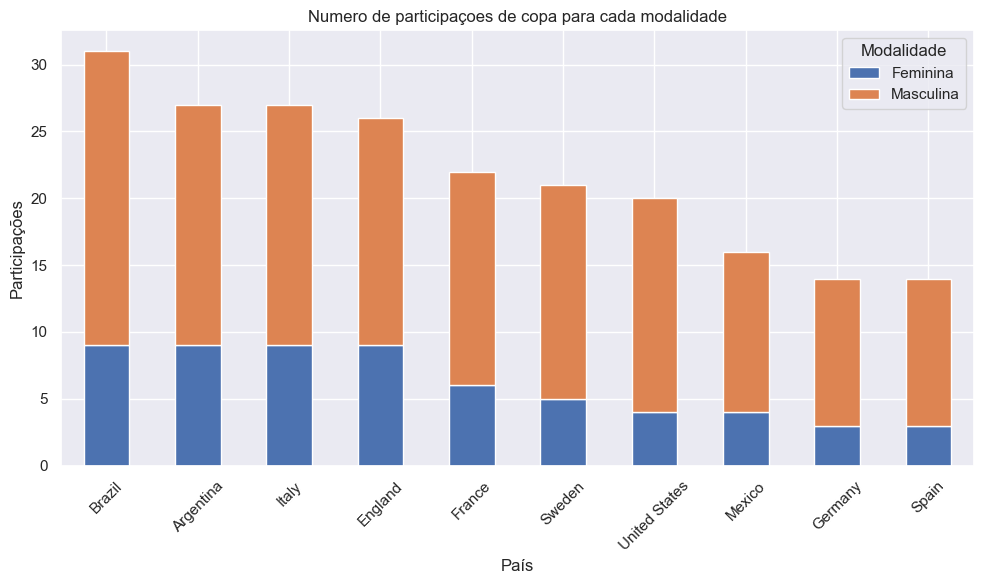

In [ ]:
# Reestruturando os dados
dados = []

# Garante que os países estejam sempre na mesma ordem
for i, pais in enumerate(lista_paises):
    for genero in participacao_por_genero:
        if i < len(participacao_por_genero[genero]):
            dados.append({
                'pais': pais,
                'modalidade': genero,
                'num_copas': participacao_por_genero[genero][i]
            })

df_plot = pd.DataFrame(dados)


df_pivot = df_plot.pivot(index='pais', columns='modalidade', values='num_copas').fillna(0)


df_pivot = df_pivot.loc[lista_paises]

# Gráfico empilhado
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#dd8452'])

plt.title('Numero de participaçoes de copa para cada modalidade')
plt.xlabel('País')
plt.ylabel('Participações')
plt.xticks(rotation=45)
plt.legend(title='Modalidade')
plt.tight_layout()
plt.show()



In [ ]:
#### solução com plotly



fig = px.bar(
    df_plot,
    x="pais",
    y="num_copas",
    color="modalidade",
    title="Número de participações de copa para cada modalidade",
    labels={"num_copas": "Participações", "pais": "País"},
)

fig.update_layout(
    barmode='stack',  # empilhado
    xaxis_tickangle=-45
)

fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

In [ ]:
#Separação dos dados
dict_ano = {}
for i, row in wc.iterrows():
    dict_ano[row['ano']] = dict_ano.get(row['ano'], 0) + 1

print(dict_ano)

df_ano = pd.DataFrame.from_dict(dict_ano,orient='index',columns=['num_jogos'])
df_ano.reset_index(inplace=True)
df_ano.columns = ['ano', 'num_jogos']
df_ano = df_ano.sort_values('num_jogos',ascending=False)

#Grafico 1
fig1 = px.bar(
    df_ano,
    x = 'ano',
    y = 'num_jogos',
    title= 'Numero de jogos por ano da copa'
)

fig1.update_xaxes(
    tickmode='array',
    tickvals=df_ano['ano'].unique()
)
fig1.show()



#Preparação dos dados 2
df_gol_ano = wc[['ano', 'gols_1', 'gols_2']]
df_gol_ano = df_gol_ano.groupby(['ano']).sum().reset_index()  # Reset the index to make 'ano' a column
df_long = df_gol_ano.melt(id_vars='ano', value_vars=['gols_1', 'gols_2'],
                          var_name='time', value_name='gols')
#Grafico 2
fig = px.area(df_long,x = 'ano', y = 'gols' , color='time', title= 'Gols por ano(ambos os times)')
fig.show()

Preparaçao dos dados 3

def contar_cartoes_vermelhos(valor):
    if pd.isna(valor):
        return 0
    return len(valor.split("|"))

def contar_cartoes_amarelos(valor):
    if pd.isna(valor):
        return 0
    return len(valor.split(','))

num_cartoes = wc [['ano','cartao_vermelho_1', 'cartao_vermelho_2', 'cartao_amarelo_1', 'cartao_amarelo_2']].copy()

num_cartoes['num_cartoes_vermelhos_1'] = num_cartoes['cartao_vermelho_1'].apply(contar_cartoes_vermelhos)
num_cartoes['num_cartoes_vermelhos_2'] = num_cartoes['cartao_vermelho_2'].apply(contar_cartoes_vermelhos)

num_cartoes['num_cartoes_amarelos_1'] = num_cartoes['cartao_amarelo_1'].apply(contar_cartoes_amarelos)
num_cartoes['num_cartoes_amarelos_2'] = num_cartoes['cartao_amarelo_2'].apply(contar_cartoes_amarelos)


num_cartoes_ano = num_cartoes[['ano','num_cartoes_vermelhos_1','num_cartoes_vermelhos_2','num_cartoes_amarelos_1','num_cartoes_amarelos_2']].copy()
num_cartoes_ano = num_cartoes_ano.groupby(['ano']).sum().reset_index()
num_cartoes_ano_long = num_cartoes_ano.melt(id_vars='ano',value_vars=['num_cartoes_vermelhos_1','num_cartoes_vermelhos_2','num_cartoes_amarelos_1','num_cartoes_amarelos_2'],
                                            var_name='Tipo - Time' , value_name= 'cartoes')

#Grafico 3
fig = px.area(num_cartoes_ano_long,x = 'ano', y = 'cartoes' , color='Tipo - Time', title= 'Cartoes por ano(ambos os times)')
fig.show()

#Preparaçao dos dados 4
def contar_gol(valor):
    if pd.isna(valor):
        return 0
    return len(valor.split("|"))
df_gol_contra = wc[['ano',"gols_1_contra",'gols_2_contra']].copy()

df_gol_contra['num_gols_1_contra'] = df_gol_contra['gols_1_contra'].apply(contar_gol)
df_gol_contra['num_gols_2_contra'] = df_gol_contra['gols_2_contra'].apply(contar_gol)

df_gol_contra = df_gol_contra.drop(columns=['gols_1_contra','gols_2_contra'], errors='ignore')

df_gol_contra['num_gols_contra'] = df_gol_contra['num_gols_2_contra'] + df_gol_contra['num_gols_2_contra']
df_gol_contra = df_gol_contra.drop(columns=['num_gols_1_contra','num_gols_2_contra'], errors='ignore')
df_gol_contra = df_gol_contra.groupby(['ano']).sum().reset_index()
display(df_gol_contra)


#Grafico 4

            


,ano,num_gols_contra
0,1930,0
1,1934,0
2,1938,2
3,1950,0
4,1954,2
5,1958,0
6,1962,0
7,1966,0
8,1970,0
9,1974,2
